# Goals added prediction

In [2]:
import pandas as pd
import numpy as np


In [306]:
a = list(range(1,8))
a.extend(range(11,25))
df_raw = pd.read_csv("data/g+_usd_age.csv", usecols=a)
df_raw = df_raw.dropna()

In [307]:
y = df_raw[['Goals Added']]
feature = df_raw.drop(['Goals Added', 'Season', 'club', 'player','PKG/A', 'GS', 'SOG', 'MINS'], axis=1)
feature = feature.dropna()
feature

,age,join_age,usd,POS,GP,G,A,SHTS,GWG,HmG,RdG,G/90min,SC%
0,24.0,22.0,2360000.0,D,22.0,2.0,1.0,17.0,1.0,2.0,0.0,0.10,11.8
1,18.0,18.0,118000.0,D,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0
2,21.0,20.0,1180000.0,D,16.0,0.0,1.0,4.0,0.0,0.0,0.0,0.00,0.0
3,22.0,22.0,1180000.0,D,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.00,0.0
4,37.0,33.0,295000.0,D,11.0,0.0,1.0,2.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,26.0,22.0,2360000.0,M,16.0,3.0,2.0,31.0,2.0,3.0,0.0,0.21,9.7
437,32.0,31.0,1180000.0,M,21.0,3.0,3.0,16.0,0.0,2.0,1.0,0.24,18.8
438,23.0,21.0,236000.0,M,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0
439,18.0,17.0,118000.0,F,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [308]:
def simp_pos(s):
    if s=='M-F':
        return 'M'
    elif s=='F-M':
        return 'F'
    elif s=='M-D':
        return 'M'
    elif s=='D-M':
        return 'D'
    else:
        return s

In [309]:
feature['POS'] = feature['POS'].apply(simp_pos)

In [310]:
from sklearn.preprocessing import OneHotEncoder

In [311]:
cat_encoder = OneHotEncoder()
pos_cat = feature[['POS']]
pos_cat_hot = cat_encoder.fit_transform(pos_cat)
pos_cat_hot

<440x3 sparse matrix of type '<class 'numpy.float64'>'
	with 440 stored elements in Compressed Sparse Row format>

In [312]:
pos_cat_hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [313]:
cat_encoder.categories_

[array(['D', 'F', 'M'], dtype=object)]

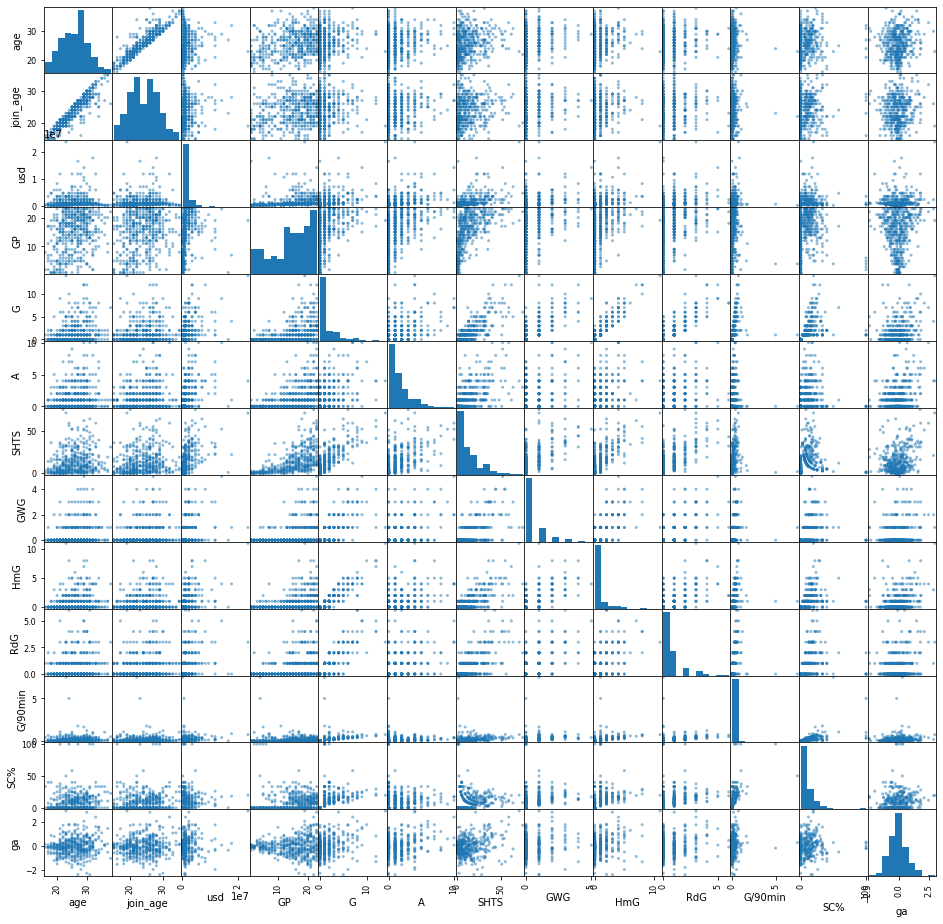

In [314]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
feature_p = feature
feature_p['ga'] = y
feature_p['age'] = df_raw[['age']]
scatter_matrix(feature_p, figsize=(16,16))
plt.show()

In [315]:
ug = feature[['ga', 'usd']]
ug

,ga,usd
0,0.46,2360000.0
1,-0.11,118000.0
2,0.27,1180000.0
3,-0.20,1180000.0
4,-0.52,295000.0
...,...,...
436,0.63,2360000.0
437,-0.03,1180000.0
438,-0.50,236000.0
439,-0.01,118000.0


In [316]:
ug['usd'] = np.log(ug['usd'])

/Users/solgaleo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [317]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, covariance_type='tied')
gm.fit(ug[['ga','usd']])

GaussianMixture(covariance_type='tied', n_components=4)

In [318]:
print(gm.means_)
print(gm.covariances_)

[[-0.05668235 12.57543667]
 [-0.31520296 13.67717004]
 [ 0.12421194 15.28436948]
 [ 0.32391224 13.84490924]]
[[0.48162078 0.00874994]
 [0.00874994 0.2694347 ]]


In [319]:
gm.weights_

array([0.19602838, 0.40014551, 0.19254945, 0.21127666])

In [320]:
gm.converged_

True

In [321]:
gm.n_iter_

7

In [322]:
ug['gaussian'] = gm.predict(ug[['ga','usd']])

/Users/solgaleo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [323]:
ug

,ga,usd,gaussian
0,0.46,14.674172,2
1,-0.11,11.678440,0
2,0.27,13.981025,1
3,-0.20,13.981025,1
4,-0.52,12.594731,0
...,...,...,...
436,0.63,14.674172,2
437,-0.03,13.981025,1
438,-0.50,12.371587,0
439,-0.01,11.678440,0


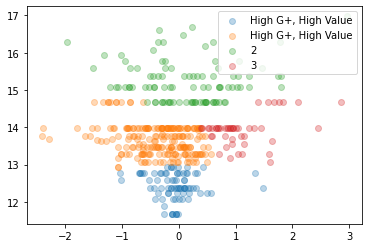

In [324]:
ug0 = ug[ug['gaussian']==0]
ug1 = ug[ug['gaussian']==1]
ug2 = ug[ug['gaussian']==2]
ug3 = ug[ug['gaussian']==3]

plt.scatter(ug0['ga'],ug0['usd'], alpha=0.3, label='High G+, High Value')
plt.scatter(ug1['ga'],ug1['usd'], alpha=0.3, label='High G+, High Value')
plt.scatter(ug2['ga'],ug2['usd'], alpha=0.3, label='2')
plt.scatter(ug3['ga'],ug3['usd'], alpha=0.3, label='3')
plt.legend(loc='best')
plt.show()

In [325]:
feature

,age,join_age,usd,POS,GP,G,A,SHTS,GWG,HmG,RdG,G/90min,SC%,ga
0,24.0,22.0,2360000.0,D,22.0,2.0,1.0,17.0,1.0,2.0,0.0,0.10,11.8,0.46
1,18.0,18.0,118000.0,D,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,-0.11
2,21.0,20.0,1180000.0,D,16.0,0.0,1.0,4.0,0.0,0.0,0.0,0.00,0.0,0.27
3,22.0,22.0,1180000.0,D,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.00,0.0,-0.20
4,37.0,33.0,295000.0,D,11.0,0.0,1.0,2.0,0.0,0.0,0.0,0.00,0.0,-0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,26.0,22.0,2360000.0,M,16.0,3.0,2.0,31.0,2.0,3.0,0.0,0.21,9.7,0.63
437,32.0,31.0,1180000.0,M,21.0,3.0,3.0,16.0,0.0,2.0,1.0,0.24,18.8,-0.03
438,23.0,21.0,236000.0,M,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,-0.50
439,18.0,17.0,118000.0,F,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-0.01


In [381]:
feature[['D','M','F']] = pos_cat_hot.toarray()
feature['join_years'] = feature['age']-feature['join_age']
feature['age2'] = np.square(feature['age'])

In [382]:
X = feature[['age', 'age2', 'join_years','D','M','F']]
y_usd = ug['usd']
y_g = ug['ga']

In [383]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [384]:
len(X), len(y_usd), len(y_g)

(440, 440, 440)

In [385]:
X

,age,age2,join_years,D,M,F
0,24.0,576.0,2.0,1.0,0.0,0.0
1,18.0,324.0,0.0,1.0,0.0,0.0
2,21.0,441.0,1.0,1.0,0.0,0.0
3,22.0,484.0,0.0,1.0,0.0,0.0
4,37.0,1369.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...
436,26.0,676.0,4.0,0.0,0.0,1.0
437,32.0,1024.0,1.0,0.0,0.0,1.0
438,23.0,529.0,2.0,0.0,0.0,1.0
439,18.0,324.0,1.0,0.0,1.0,0.0


In [386]:
lin_reg.fit(X, y_usd)
lin_reg.intercept_, lin_reg.coef_

(5.016444603055287,
 array([ 0.66196437, -0.01217404,  0.0312251 , -0.33352605,  0.18959995,
         0.14392611]))

In [387]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y_usd, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usd   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     14.84
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           1.90e-13
Time:                        15:35:48   Log-Likelihood:                -588.31
No. Observations:                 440   AIC:                             1189.
Df Residuals:                     434   BIC:                             1213.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7623      0.958      3.926      0.0

In [388]:
est3 = sm.OLS(y_g, X2)
est4 = est3.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:                     ga   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.521
Date:                Sun, 07 Mar 2021   Prob (F-statistic):              0.182
Time:                        16:01:22   Log-Likelihood:                -487.03
No. Observations:                 440   AIC:                             986.1
Df Residuals:                     434   BIC:                             1011.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0883      0.761      0.116      0.9

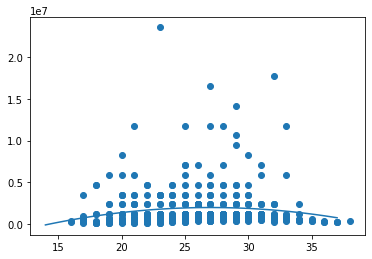

In [380]:
x = np.linspace(14,37,100)
c = lin_reg.intercept_
b, a = lin_reg.coef_
y = b*x + a*x**2 +c


plt.scatter(X['age'], y_usd)
plt.plot(x, y)
plt.show()

In [357]:
-b/(2*a)

27.22146171093936

In [391]:
dX = X[X['D']==1]
mX = X[X['M']==1]
fX = X[X['F']==1]

dy_usd = y_usd[X['D']==1]
my_usd = y_usd[X['M']==1]
fy_usd = y_usd[X['F']==1]

dy_g = y_g[X['D']==1]
my_g = y_g[X['M']==1]
fy_g = y_g[X['F']==1]

In [392]:
dX = dX[['age', 'age2']]
mX = mX[['age', 'age2']]
fX = fX[['age', 'age2']]

In [444]:
def ols(X, y):
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

In [465]:
ols(fX, fy_usd)

                            OLS Regression Results                            
Dep. Variable:                    usd   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     8.931
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           0.000198
Time:                        18:14:20   Log-Likelihood:                -273.09
No. Observations:                 188   AIC:                             552.2
Df Residuals:                     185   BIC:                             561.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0699      2.247      2.256      0.0

In [461]:
ols(fX, fy_g)

                            OLS Regression Results                            
Dep. Variable:                     ga   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.080
Date:                Sun, 07 Mar 2021   Prob (F-statistic):             0.0185
Time:                        18:12:16   Log-Likelihood:                -202.51
No. Observations:                 188   AIC:                             411.0
Df Residuals:                     185   BIC:                             420.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0382      1.544      0.673      0.5

In [482]:
from scipy import stats

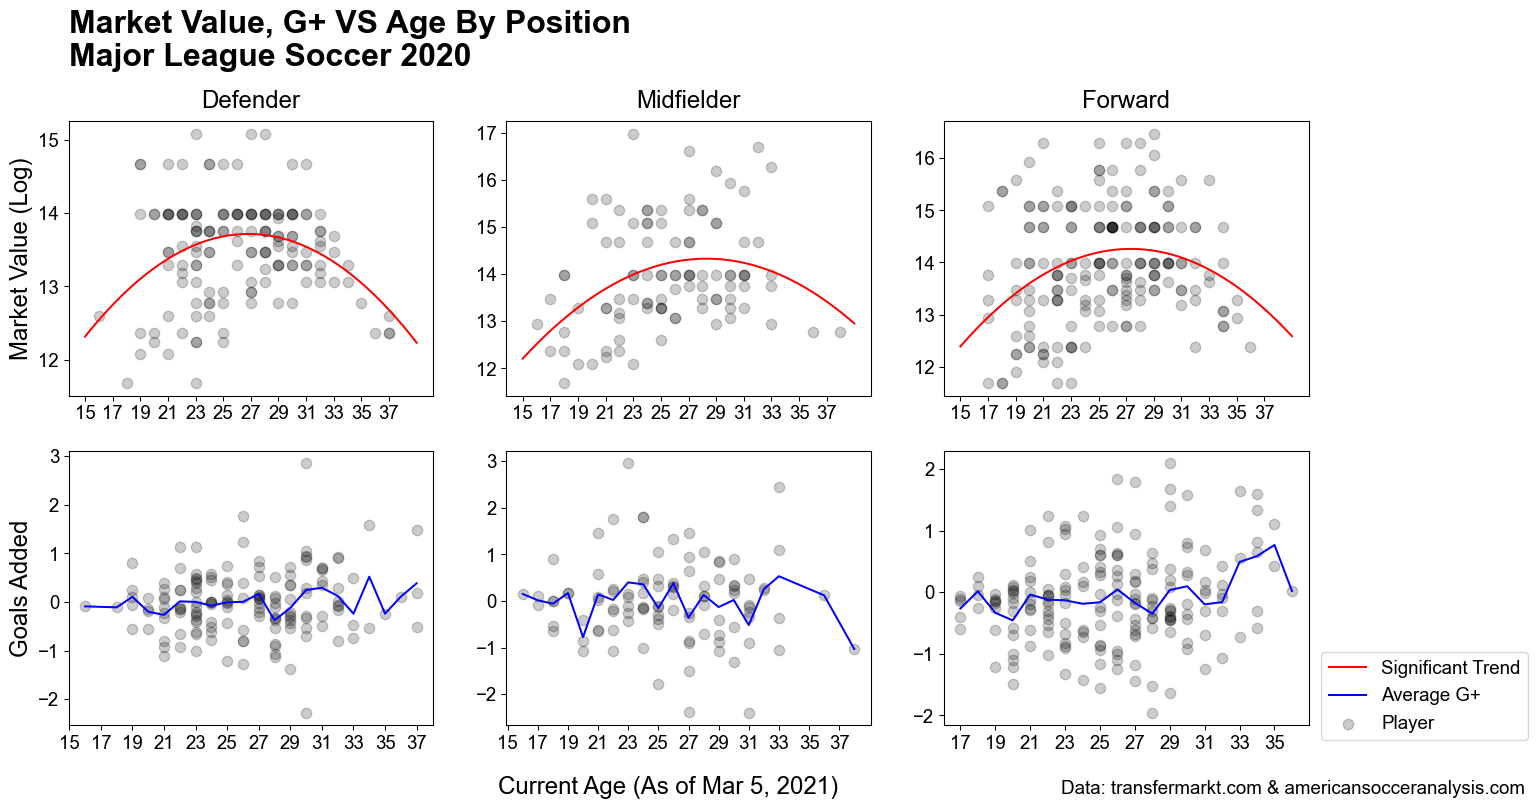

In [507]:
a = 0.2 # color alpha
a_grid = 0.4 # grid alpha
# font size
titlef = 24
tickf = 18
annof = 14
my_dpi=96
plt.figure(figsize=(1600/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.rcParams["font.family"] = "Arial"


plt.subplot(2,3,1)
plt.scatter(dX['age'], dy_usd, color='k', s=60, label='Player', alpha=a)
plt.title("Defender", fontsize=tickf, y=1.02)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(range(11, 18,1), fontsize=14)
plt.ylabel("Market Value (Log)", fontsize=tickf)

# plot age quadratic prediction
xq = np.linspace(15,39,100)
aq = -0.0100
bq = 0.5365 
cq = 6.5201
yq = bq*xq + aq*xq**2 +cq
plt.plot(xq, yq, color='r', label="Quadratic Trend")

plt.subplot(2,3,2)
plt.scatter(mX['age'], my_usd, color='k', s=60, label='Player', alpha=a)
plt.title("Midfielder", fontsize=tickf, y=1.02)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(range(11, 18,1), fontsize=14)

# plot age quadratic prediction
aq = -0.0120
bq = 0.6791  
cq = 4.7192
yq = bq*xq + aq*xq**2 +cq
plt.plot(xq, yq, color='r', label="Quadratic Trend")

plt.subplot(2,3,3)
plt.scatter(fX['age'], fy_usd, color='k', s=60, label='Player', alpha=a)
plt.title("Forward", fontsize=tickf, y=1.02)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(range(11, 18,1), fontsize=14)

# plot age quadratic prediction
aq = -0.0123
bq = 0.6724 
cq = 5.0699
yq = bq*xq + aq*xq**2 +cq
plt.plot(xq, yq, color='r', label="Quadratic Trend")

plt.subplot(2,3,4)
plt.scatter(dX['age'], dy_g, color='k', s=60, label='Player', alpha=a)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(range(-3, 4,1), fontsize=14)
plt.ylabel("Goals Added", fontsize=tickf)

# calculate mean and CI
x = sorted(dX['age'].unique())
y = np.array([])
c = np.array([])
for k in x:
    yk = dy_g[dX['age']==k]
    n = len(yk)
    my = np.mean(yk)
    s = np.std(yk)
    ci = stats.t.ppf(1-0.05, n-1)*s/np.sqrt(n)
    y = np.append(y, my)
    c = np.append(c, ci)

plt.plot(x,y, color='b', label="Average G+")
# plt.fill_between(x, (y-c), (y+c), color='b', alpha=.1, label='95% Inteval')

plt.subplot(2,3,5)
plt.scatter(mX['age'], my_g, color='k', s=60, label='Player', alpha=a)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(range(-3, 4,1), fontsize=14)

# calculate mean and CI
x = sorted(mX['age'].unique())
y = np.array([])
c = np.array([])
for k in x:
    yk = my_g[mX['age']==k]
    n = len(yk)
    my = np.mean(yk)
    s = np.std(yk)
    ci = stats.t.ppf(1-0.05, n-1)*s/np.sqrt(n)
    y = np.append(y, my)
    c = np.append(c, ci)

plt.plot(x,y, color='b', label="Average G+")
# plt.fill_between(x, (y-c), (y+c), color='b', alpha=.1, label='95% Inteval')

plt.subplot(2,3,6)
plt.scatter(fX['age'], fy_g, color='k', s=60, label='Player', alpha=a)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(range(-3, 4,1), fontsize=annof)
plt.plot([],[],color='r', label='Significant Trend')

# calculate mean and CI
x = sorted(fX['age'].unique())
y = np.array([])
c = np.array([])
for k in x:
    yk = fy_g[fX['age']==k]
    n = len(yk)
    my = np.mean(yk)
    s = np.std(yk)
    ci = stats.t.ppf(1-0.05, n-1)*s/np.sqrt(n)
    y = np.append(y, my)
    c = np.append(c, ci)

plt.plot(x,y, color='b', label="Average G+")
# plt.fill_between(x, (y-c), (y+c), color='b', alpha=.1, label='95% Inteval')

plt.figtext(0.5, 0.04, "Current Age (As of Mar 5, 2021)", fontsize=tickf, ha='center')
plt.suptitle("Market Value, G+ VS Age By Position\nMajor League Soccer 2020", fontsize=titlef,
             x=0.125, y=1.02, fontweight='bold', ha='left',)
plt.legend(bbox_to_anchor=(1.01, 0.3), loc='upper left', fontsize=14)
plt.figtext(0.745, 0.04, "Data: transfermarkt.com & americansocceranalysis.com", fontsize=annof)
plt.savefig('img/g+_age_pos.png', bbox_inches='tight')
plt.show()

In [487]:
x

[16.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0]

In [488]:
k

16.0

In [492]:
fy_g[fy_g[dX['age']==10000]]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).